In [1]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
%matplotlib inline

In [2]:
import numpy as np


with open('decXtrain.npy', 'rb') as f:
    newXtrain = np.load(f)


newXtrain.shape
#plt.imshow(newXtrain[35])


(19748, 21, 21)

In [3]:
newYtrain = np.ndarray(shape=(19748,), dtype=np.uint8)
for i in range(1982):
   newYtrain[i] = 0

for i in range(1982,3964):
   newYtrain[i] = 1

for i in range(3964,5917):
   newYtrain[i] = 2

for i in range(5917,7892):
   newYtrain[i] = 3

for i in range(7892,9872):
   newYtrain[i] = 4

for i in range(9872,11858):
   newYtrain[i] = 5

for i in range(11858,13839):
   newYtrain[i] = 6

for i in range(13839,15797):
   newYtrain[i] = 7

for i in range(15797,17781):
   newYtrain[i] = 8

for i in range(17781,19748):
   newYtrain[i] = 9
newYtrain.shape


(19748,)

In [4]:
from tensorflow.keras import datasets, layers, models

X_train = newXtrain.reshape(-1,21,21,1)

model = keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(21, 21, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(84, activation='sigmoid')
])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 19, 19, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 128)         36992     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [5]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

my_model = model.fit(X_train,newYtrain , epochs=15)
model.save("infGraph.h5")

Epoch 1/15
618/618 [==============================] - 7s 8ms/step - loss: 1.3493 - accuracy: 0.5791
Epoch 2/15
618/618 [==============================] - 5s 7ms/step - loss: 0.3954 - accuracy: 0.8689
Epoch 3/15
618/618 [==============================] - 5s 7ms/step - loss: 0.3129 - accuracy: 0.8961
Epoch 4/15
618/618 [==============================] - 5s 8ms/step - loss: 0.2658 - accuracy: 0.9103
Epoch 5/15
618/618 [==============================] - 4s 7ms/step - loss: 0.2261 - accuracy: 0.9243
Epoch 6/15
618/618 [==============================] - 5s 7ms/step - loss: 0.2150 - accuracy: 0.9293
Epoch 7/15
618/618 [==============================] - 5s 7ms/step - loss: 0.1766 - accuracy: 0.9408
Epoch 8/15
618/618 [==============================] - 5s 8ms/step - loss: 0.1706 - accuracy: 0.9412
Epoch 9/15
618/618 [==============================] - 5s 7ms/step - loss: 0.1640 - accuracy: 0.9444
Epoch 10/15
618/618 [==============================] - 4s 7ms/step - loss: 0.1445 - accuracy: 0.9516

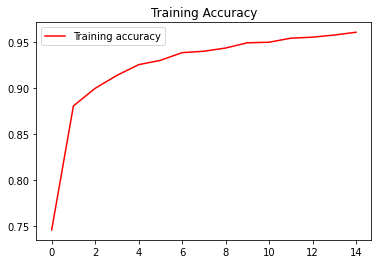

<Figure size 432x288 with 0 Axes>

In [6]:

acc = my_model.history['accuracy']
loss = my_model.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

16/16 [==============================] - 0s 9ms/step - loss: 0.2243 - accuracy: 0.9113


[0.22433097660541534, 0.9112903475761414]

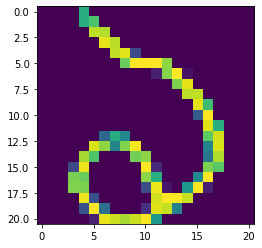

In [7]:
with open('binXtest.npy', 'rb') as f:
    newXtest = np.load(f)

newYtest = np.ndarray(shape=(496,), dtype=np.uint8)
for i in range(167):
   newYtest[i] = 0

for i in range(167,496):
   newYtest[i] = 1
X_test = newXtest.reshape(-1,21,21,1)

plt.imshow(X_test[167])
model.evaluate(X_test, newYtest)

In [8]:
predictions = model.predict(X_test)

predictions.shape

(496, 84)

In [9]:
y_predicted_labels = [np.argmax(i) for i in predictions]
cm = tf.math.confusion_matrix(labels=newYtest,predictions=y_predicted_labels)

Text(42.0, 0.5, 'Real')

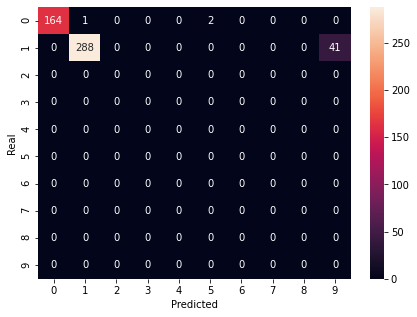

In [10]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [11]:
with open('XtestNumta.npy', 'rb') as f:
    numtaXtest = np.load(f)

numtaXtest = numtaXtest.reshape(-1,21,21,1)

numtaPredictions = model.predict(numtaXtest)

2

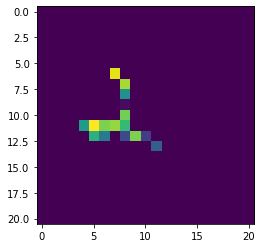

In [13]:
plt.imshow(numtaXtest[12])
np.argmax(numtaPredictions[12])